In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Loading the datasets
true_df = pd.read_csv("C://Users//user//Downloads//true.csv")
fake_df = pd.read_csv("C://Users//user//Downloads//fake.csv")

In [5]:
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [6]:
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
# To test for small dataset

#true_df = true_df.head(1000)
#fake_df = fake_df.head(1000)

In [9]:
# Checking for missing/null values

print("Missing/Null values in true_df:")
print(true_df.isnull().sum())

Missing/Null values in true_df:
title      0
text       0
subject    0
date       0
dtype: int64


In [10]:
print("\nMissing/Null values in fake_df:")
print(fake_df.isnull().sum())


Missing/Null values in fake_df:
title      0
text       0
subject    0
date       0
dtype: int64


In [11]:
# Removing duplicates

true_df.drop_duplicates(inplace=True)
fake_df.drop_duplicates(inplace=True)

In [12]:
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [13]:
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [14]:
# Function for text preprocessing (tokenization, stopword removal, lemmatization, and additional filters)

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    tokens = nltk.word_tokenize(text.lower())
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    
    return filtered_tokens

In [15]:
# Applying text preprocessing to the datasets

true_df['tokenized_text'] = true_df['text'].apply(preprocess_text)
fake_df['tokenized_text'] = fake_df['text'].apply(preprocess_text)


In [16]:
true_df

,title,text,subject,date,tokenized_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017","[washington, reuters, head, conservative, repu..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017","[washington, reuters, transgender, people, all..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017","[washington, reuters, special, counsel, invest..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017","[washington, reuters, trump, campaign, adviser..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017","[seattlewashington, reuters, president, donald..."
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017","[brussels, reuters, nato, ally, tuesday, welco..."
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017","[london, reuters, lexisnexis, provider, legal,..."
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017","[minsk, reuters, shadow, disused, sovietera, f..."
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017","[moscow, reuters, vatican, secretary, state, c..."


In [17]:
fake_df

,title,text,subject,date,tokenized_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017","[donald, trump, wish, american, happy, new, ye..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017","[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017","[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017","[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017","[pope, francis, used, annual, christmas, day, ..."
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016","[century, wire, say, reported, earlier, week, ..."
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016","[century, wire, say, familiar, theme, whenever..."
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016","[patrick, henningsen, century, wireremember, o..."
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016","[century, wire, say, al, jazeera, america, go,..."


In [18]:
# Function for generating word frequency table and WordCloud

def explore_textual_data(tokens_series, title):
    all_tokens = [token for tokens in tokens_series for token in tokens]

    freq_dist = nltk.FreqDist(all_tokens)
    common_words = freq_dist.most_common(100)
    word_freq_table = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

    # Displaying the word frequency table
    print(f"\nTop 100 words in {title}:\n{word_freq_table}")

    # WordCloud
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(dict(common_words))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {title}")
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_2660\2442435048.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  explore_textual_data(true_df['tokenized_text'].append(fake_df['tokenized_text']), "Collection")



Top 100 words in Collection:
        Word  Frequency
0       said     128858
1      trump     127350
2          u      62926
3      state      57873
4      would      54577
..       ...        ...
95       via      11661
96      come      11648
97      part      11548
98    called      11511
99  military      11510

[100 rows x 2 columns]


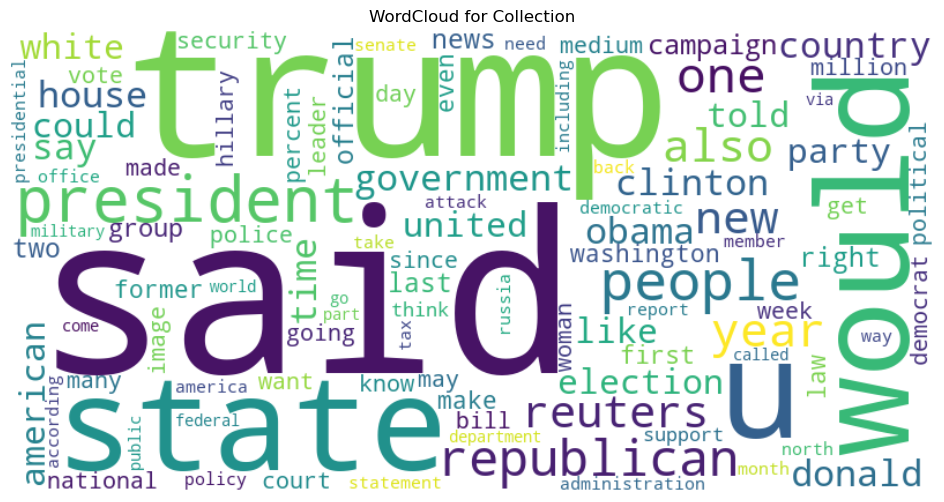

In [19]:
# Exploring textual data for the entire collection

explore_textual_data(true_df['tokenized_text'].append(fake_df['tokenized_text']), "Collection")


Top 100 words in Real News:
       Word  Frequency
0      said      97848
1     trump      53749
2         u      40687
3     state      35950
4     would      31169
..      ...        ...
95   called       5973
96   police       5961
97   attack       5931
98  russian       5930
99     news       5918

[100 rows x 2 columns]


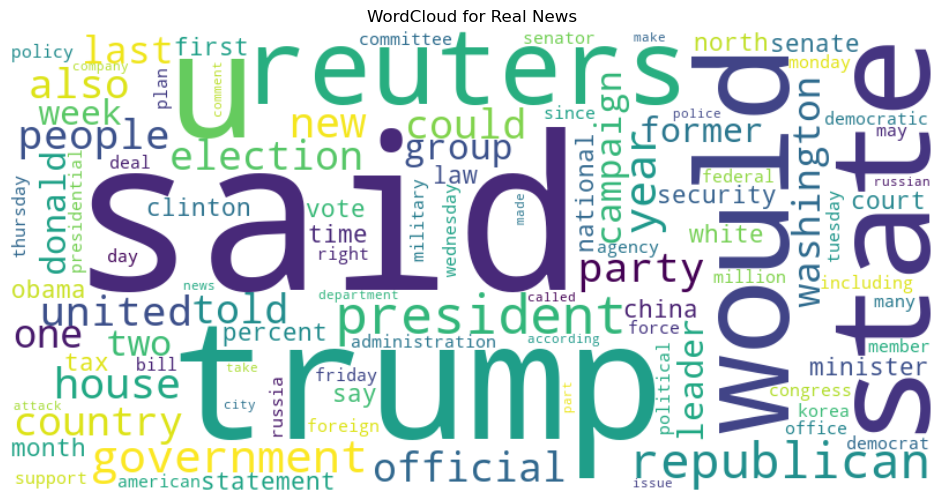

In [20]:
# Exploring textual data for real news

explore_textual_data(true_df['tokenized_text'], "Real News")


Top 100 words in Fake News:
            Word  Frequency
0          trump      73601
1           said      31010
2      president      26041
3         people      25997
4            one      23674
..           ...        ...
95          case       5751
96         still       5726
97  presidential       5684
98         child       5682
99        muslim       5664

[100 rows x 2 columns]


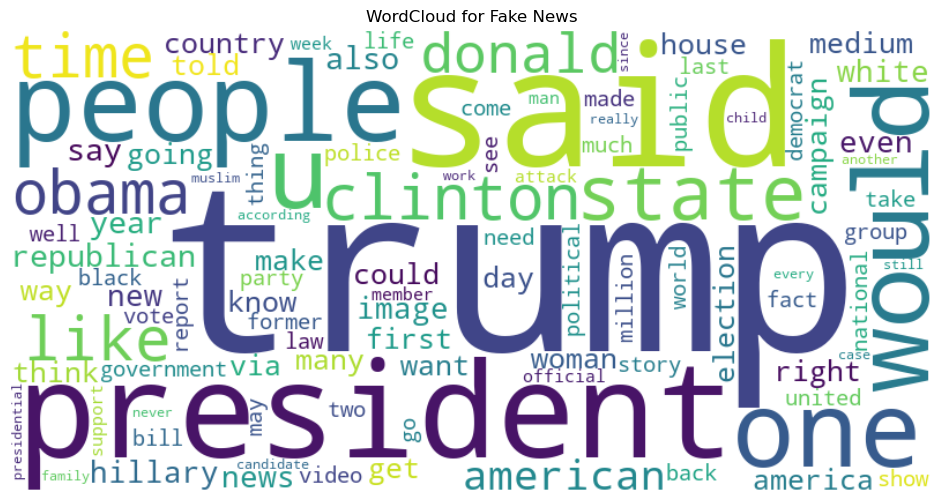

In [21]:
# Exploring textual data for fake news

explore_textual_data(fake_df['tokenized_text'], "Fake News")

In [22]:
true_df

,title,text,subject,date,tokenized_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017","[washington, reuters, head, conservative, repu..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017","[washington, reuters, transgender, people, all..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017","[washington, reuters, special, counsel, invest..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017","[washington, reuters, trump, campaign, adviser..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017","[seattlewashington, reuters, president, donald..."
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017","[brussels, reuters, nato, ally, tuesday, welco..."
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017","[london, reuters, lexisnexis, provider, legal,..."
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017","[minsk, reuters, shadow, disused, sovietera, f..."
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017","[moscow, reuters, vatican, secretary, state, c..."


In [23]:
fake_df

,title,text,subject,date,tokenized_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017","[donald, trump, wish, american, happy, new, ye..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017","[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017","[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017","[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017","[pope, francis, used, annual, christmas, day, ..."
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016","[century, wire, say, reported, earlier, week, ..."
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016","[century, wire, say, familiar, theme, whenever..."
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016","[patrick, henningsen, century, wireremember, o..."
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016","[century, wire, say, al, jazeera, america, go,..."


In [25]:
# Labeling the data for 'real' as 1 and 'fake' as 0

true_df['label'] = 1
fake_df['label'] = 0

In [26]:
# Combining the datasets

combined_df = pd.concat([true_df, fake_df], ignore_index=True)

In [27]:
combined_df

,title,text,subject,date,tokenized_text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017","[washington, reuters, head, conservative, repu...",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017","[washington, reuters, transgender, people, all...",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017","[washington, reuters, special, counsel, invest...",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017","[washington, reuters, trump, campaign, adviser...",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017","[seattlewashington, reuters, president, donald...",1
...,...,...,...,...,...,...
44684,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016","[century, wire, say, reported, earlier, week, ...",0
44685,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016","[century, wire, say, familiar, theme, whenever...",0
44686,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016","[patrick, henningsen, century, wireremember, o...",0
44687,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016","[century, wire, say, al, jazeera, america, go,...",0


In [28]:
# Converting 'tokenized_text' column to string

combined_df['tokenized_text'] = combined_df['tokenized_text'].apply(lambda tokens: ' '.join(tokens))

In [29]:
combined_df

,title,text,subject,date,tokenized_text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",washington reuters head conservative republica...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",washington reuters transgender people allowed ...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",washington reuters special counsel investigati...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",washington reuters trump campaign adviser geor...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",seattlewashington reuters president donald tru...,1
...,...,...,...,...,...,...
44684,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",century wire say reported earlier week unlikel...,0
44685,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",century wire say familiar theme whenever dispu...,0
44686,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",patrick henningsen century wireremember obama ...,0
44687,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",century wire say al jazeera america go history...,0


In [30]:
# Splitting the data into training (70%) and testing (30%) sets

train_data, test_data, train_labels, test_labels = train_test_split(
    combined_df['tokenized_text'],  # Use tokenized_text as features
    combined_df['label'],
    test_size=0.3,
    random_state=42
)

Feature Set 1: TF-IDF 

In [32]:
# TF-IDF Vectorization

tfidf_vectorizer = TfidfVectorizer()
train_features_tfidf = tfidf_vectorizer.fit_transform(train_data)
test_features_tfidf = tfidf_vectorizer.transform(test_data)

In [33]:
# Evaluating the models

def evaluate_model(predictions, true_labels, model_name):
    accuracy = accuracy_score(true_labels, predictions)
    confusion_mat = confusion_matrix(true_labels, predictions)
    classification_rep = classification_report(true_labels, predictions)

    print(f"{model_name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_mat)
    print("Classification Report:")
    print(classification_rep)

In [34]:
# Multinomial Naive Bayes Model

nb_model = MultinomialNB()
nb_cv_scores = cross_val_score(nb_model, train_features_tfidf, train_labels, cv=5)  # 5-fold cross-validation
print("Multinomial Naive Bayes Cross-Validation Scores:", nb_cv_scores)
print("Average Accuracy:", nb_cv_scores.mean())

Multinomial Naive Bayes Cross-Validation Scores: [0.93511267 0.93798945 0.93797954 0.93190537 0.92567136]
Average Accuracy: 0.9337316783207923


In [35]:
nb_model.fit(train_features_tfidf, train_labels)
nb_predictions = nb_model.predict(test_features_tfidf)

In [36]:
evaluate_model(nb_predictions, test_labels, "Multinomial Naive Bayes")

Multinomial Naive Bayes Model Evaluation:
Accuracy: 0.9371
Confusion Matrix:
[[6544  415]
 [ 428 6020]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6959
           1       0.94      0.93      0.93      6448

    accuracy                           0.94     13407
   macro avg       0.94      0.94      0.94     13407
weighted avg       0.94      0.94      0.94     13407



In [37]:
# Logistic Regression Model

logreg_model = LogisticRegression()
logreg_cv_scores = cross_val_score(logreg_model, train_features_tfidf, train_labels, cv=5)  # 5-fold cross-validation
print("Logistic Regression Cross-Validation Scores:", logreg_cv_scores)
print("Average Accuracy:", logreg_cv_scores.mean())

Logistic Regression Cross-Validation Scores: [0.98305897 0.98593575 0.98257673 0.98337596 0.98289642]
Average Accuracy: 0.9835687661532638


In [38]:
logreg_model.fit(train_features_tfidf, train_labels)
logreg_predictions = logreg_model.predict(test_features_tfidf)

In [39]:
evaluate_model(logreg_predictions, test_labels, "Logistic Regression")

Logistic Regression Model Evaluation:
Accuracy: 0.9838
Confusion Matrix:
[[6856  103]
 [ 114 6334]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6959
           1       0.98      0.98      0.98      6448

    accuracy                           0.98     13407
   macro avg       0.98      0.98      0.98     13407
weighted avg       0.98      0.98      0.98     13407



In [40]:
# Random Forest Model

rf_model = RandomForestClassifier(n_jobs=-1)
rf_cv_scores = cross_val_score(rf_model, train_features_tfidf, train_labels, cv=5)
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Average Accuracy:", rf_cv_scores.mean())

Random Forest Cross-Validation Scores: [0.98353844 0.98577593 0.98545396 0.98753197 0.98753197]
Average Accuracy: 0.9859664541442484


In [41]:
rf_model.fit(train_features_tfidf, train_labels)
rf_predictions = rf_model.predict(test_features_tfidf)

In [42]:
evaluate_model(rf_predictions, test_labels, "Random Forest")

Random Forest Model Evaluation:
Accuracy: 0.9858
Confusion Matrix:
[[6855  104]
 [  86 6362]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6959
           1       0.98      0.99      0.99      6448

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407



In [43]:
# XGBoost Model

xgb_model = XGBClassifier()
xgb_cv_scores = cross_val_score(xgb_model, train_features_tfidf, train_labels, cv=5)  # 5-fold cross-validation
print("XGBoost Cross-Validation Scores:", xgb_cv_scores)
print("Average Accuracy:", xgb_cv_scores.mean())

XGBoost Cross-Validation Scores: [0.99712322 0.99584465 0.99744246 0.99616368 0.99728261]
Average Accuracy: 0.9967713245563946


In [44]:
xgb_model.fit(train_features_tfidf, train_labels)
xgb_predictions = xgb_model.predict(test_features_tfidf)

In [45]:
evaluate_model(xgb_predictions, test_labels, "XGBoost")

XGBoost Model Evaluation:
Accuracy: 0.9969
Confusion Matrix:
[[6931   28]
 [  14 6434]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6959
           1       1.00      1.00      1.00      6448

    accuracy                           1.00     13407
   macro avg       1.00      1.00      1.00     13407
weighted avg       1.00      1.00      1.00     13407



Feature Set 2: Word Frequency (TF)

In [47]:
# Count Vectorization for word frequency features

word_freq_vectorizer = CountVectorizer(lowercase=True, stop_words='english', max_df=0.85, min_df=2)
train_features_word_freq = word_freq_vectorizer.fit_transform(train_data)
test_features_word_freq = word_freq_vectorizer.transform(test_data)

In [48]:
# Multinomial Naive Bayes Model

nb_model_word_freq = MultinomialNB()
nb_cv_scores = cross_val_score(nb_model_word_freq, train_features_word_freq, train_labels, cv=5)  # 5-fold cross-validation
print("Multinomial Naive Bayes (Word Frequency) Cross-Validation Scores:", nb_cv_scores)
print("Average Accuracy:", nb_cv_scores.mean())

Multinomial Naive Bayes (Word Frequency) Cross-Validation Scores: [0.95125459 0.95429119 0.95076726 0.94597187 0.94325448]
Average Accuracy: 0.9491078789709491


In [49]:
nb_model_word_freq.fit(train_features_word_freq, train_labels)
nb_predictions_word_freq = nb_model_word_freq.predict(test_features_word_freq)

In [50]:
evaluate_model(nb_predictions_word_freq, test_labels, "Naive Bayes (Word Frequency)")

Naive Bayes (Word Frequency) Model Evaluation:
Accuracy: 0.9502
Confusion Matrix:
[[6619  340]
 [ 328 6120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6959
           1       0.95      0.95      0.95      6448

    accuracy                           0.95     13407
   macro avg       0.95      0.95      0.95     13407
weighted avg       0.95      0.95      0.95     13407



In [51]:
# Logistic Regression Model

logreg_model_word_freq = LogisticRegression()
ogreg_cv_scores = cross_val_score(logreg_model_word_freq, train_features_word_freq, train_labels, cv=5)
print("Logistic Regression (Word Frequency) Cross-Validation Scores:", logreg_cv_scores)
print("Average Accuracy:", logreg_cv_scores.mean())

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Logistic Regression (Word Frequency) Cross-Validation Scores: [0.98305897 0.98593575 0.98257673 0.98337596 0.98289642]
Average Accuracy: 0.9835687661532638


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
logreg_model_word_freq.fit(train_features_word_freq, train_labels)
logreg_predictions_word_freq = logreg_model_word_freq.predict(test_features_word_freq)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
evaluate_model(logreg_predictions_word_freq, test_labels, "Logistic Regression (Word Frequency)")

Logistic Regression (Word Frequency) Model Evaluation:
Accuracy: 0.9945
Confusion Matrix:
[[6930   29]
 [  45 6403]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6959
           1       1.00      0.99      0.99      6448

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407



In [54]:
# Random Forest Model

rf_model_word_freq = RandomForestClassifier(n_jobs=-1)
rf_cv_scores = cross_val_score(rf_model_word_freq, train_features_word_freq, train_labels, cv=5)
print("Random Forest (Word Frequency) Cross-Validation Scores:", rf_cv_scores)
print("Average Accuracy:", rf_cv_scores.mean())

Random Forest (Word Frequency) Cross-Validation Scores: [0.98801342 0.98737414 0.98753197 0.9907289  0.98705243]
Average Accuracy: 0.9881401730317798


In [55]:
rf_model_word_freq.fit(train_features_word_freq, train_labels)
rf_predictions_word_freq = rf_model_word_freq.predict(test_features_word_freq)

In [56]:
evaluate_model(rf_predictions_word_freq, test_labels, "Random Forest (Word Frequency)")

Random Forest (Word Frequency) Model Evaluation:
Accuracy: 0.9889
Confusion Matrix:
[[6877   82]
 [  67 6381]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6959
           1       0.99      0.99      0.99      6448

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407



In [57]:
# XGBoost Model

xgb_model_word_freq = XGBClassifier()
xgb_cv_scores = cross_val_score(xgb_model_word_freq, train_features_word_freq, train_labels, cv=5)
print("XGBoost (Word Frequency) Cross-Validation Scores:", xgb_cv_scores)
print("Average Accuracy:", xgb_cv_scores.mean())

XGBoost (Word Frequency) Cross-Validation Scores: [0.9969634  0.9961643  0.99792199 0.99648338 0.99664322]
Average Accuracy: 0.9968352580659532


In [58]:
xgb_model_word_freq.fit(train_features_word_freq, train_labels)
xgb_predictions_word_freq = xgb_model_word_freq.predict(test_features_word_freq)

In [59]:
evaluate_model(xgb_predictions_word_freq, test_labels, "XGBoost (Word Frequency)")

XGBoost (Word Frequency) Model Evaluation:
Accuracy: 0.9967
Confusion Matrix:
[[6930   29]
 [  15 6433]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6959
           1       1.00      1.00      1.00      6448

    accuracy                           1.00     13407
   macro avg       1.00      1.00      1.00     13407
weighted avg       1.00      1.00      1.00     13407



Feature Set 3: Bag of Words

In [61]:
# Bag of Words Vectorization

bow_vectorizer = CountVectorizer(lowercase=True, stop_words='english', max_df=0.85, min_df=2, ngram_range=(1, 2), token_pattern=r'\b\w+\b')
train_features_bow = bow_vectorizer.fit_transform(train_data)
test_features_bow = bow_vectorizer.transform(test_data)

In [62]:
# Multinomial Naive Bayes Model

nb_model_bow = MultinomialNB()
nb_cv_scores_bow = cross_val_score(nb_model_bow, train_features_bow, train_labels, cv=5)  # 5-fold cross-validation
print("Multinomial Naive Bayes (BoW) Cross-Validation Scores:", nb_cv_scores_bow)
print("Average Accuracy:", nb_cv_scores_bow.mean())

Multinomial Naive Bayes (BoW) Cross-Validation Scores: [0.96899473 0.97043311 0.96467391 0.96755115 0.96179668]
Average Accuracy: 0.9666899159897436


In [63]:
nb_model_bow.fit(train_features_bow, train_labels)
nb_predictions_bow = nb_model_bow.predict(test_features_bow)

In [64]:
evaluate_model(nb_predictions_bow, test_labels, "Naive Bayes (BoW)")

Naive Bayes (BoW) Model Evaluation:
Accuracy: 0.9681
Confusion Matrix:
[[6653  306]
 [ 122 6326]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6959
           1       0.95      0.98      0.97      6448

    accuracy                           0.97     13407
   macro avg       0.97      0.97      0.97     13407
weighted avg       0.97      0.97      0.97     13407



In [65]:
# Logistic Regression Model

logreg_model_bow = LogisticRegression()
logreg_cv_scores_bow = cross_val_score(logreg_model_bow, train_features_bow, train_labels, cv=5)  # 5-fold cross-validation
print("Logistic Regression (BoW) Cross-Validation Scores:", logreg_cv_scores_bow)
print("Average Accuracy:", logreg_cv_scores_bow.mean())

Logistic Regression (BoW) Cross-Validation Scores: [0.99520537 0.99488573 0.99712276 0.99712276 0.99616368]
Average Accuracy: 0.9961000610262797


In [66]:
logreg_model_bow.fit(train_features_bow, train_labels)
logreg_predictions_bow = logreg_model_bow.predict(test_features_bow)

In [67]:
evaluate_model(logreg_predictions_bow, test_labels, "Logistic Regression (BoW)")

Logistic Regression (BoW) Model Evaluation:
Accuracy: 0.9955
Confusion Matrix:
[[6932   27]
 [  33 6415]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6959
           1       1.00      0.99      1.00      6448

    accuracy                           1.00     13407
   macro avg       1.00      1.00      1.00     13407
weighted avg       1.00      1.00      1.00     13407



In [68]:
# Random Forest Model

rf_model_bow = RandomForestClassifier(n_jobs=-1)
rf_cv_scores_bow = cross_val_score(rf_model_bow, train_features_bow, train_labels, cv=5)  # 5-fold cross-validation
print("Random Forest (BoW) Cross-Validation Scores:", rf_cv_scores_bow)
print("Average Accuracy:", rf_cv_scores_bow.mean())

Random Forest (BoW) Cross-Validation Scores: [0.98417772 0.98721432 0.98769182 0.98529412 0.98209719]
Average Accuracy: 0.9852950322237561


In [69]:
rf_model_bow.fit(train_features_bow, train_labels)
rf_predictions_bow = rf_model_bow.predict(test_features_bow)

In [70]:
evaluate_model(rf_predictions_bow, test_labels, "Random Forest (BoW)")

Random Forest (BoW) Model Evaluation:
Accuracy: 0.9858
Confusion Matrix:
[[6836  123]
 [  68 6380]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6959
           1       0.98      0.99      0.99      6448

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407



In [71]:
# XGBoost Model

xgb_model_bow = XGBClassifier()
xgb_cv_scores_bow = cross_val_score(xgb_model_bow, train_features_bow, train_labels, cv=5)  # 5-fold cross-validation
print("XGBoost (BoW) Cross-Validation Scores:", xgb_cv_scores_bow)
print("Average Accuracy:", xgb_cv_scores_bow.mean())

XGBoost (BoW) Cross-Validation Scores: [0.99760268 0.9961643  0.99792199 0.99696292 0.99632353]
Average Accuracy: 0.9969950841758


In [72]:
xgb_model_bow.fit(train_features_bow, train_labels)
xgb_predictions_bow = xgb_model_bow.predict(test_features_bow)

In [73]:
evaluate_model(xgb_predictions_bow, test_labels, "XGBoost (BoW)")

XGBoost (BoW) Model Evaluation:
Accuracy: 0.9967
Confusion Matrix:
[[6930   29]
 [  15 6433]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6959
           1       1.00      1.00      1.00      6448

    accuracy                           1.00     13407
   macro avg       1.00      1.00      1.00     13407
weighted avg       1.00      1.00      1.00     13407



In [74]:
# Loading the datasets

true_df_pos = pd.read_csv("C://Users//user//Downloads//true.csv")
fake_df_pos = pd.read_csv("C://Users//user//Downloads//fake.csv")

In [75]:
true_df_pos

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [76]:
fake_df_pos

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
# To check for small dataset

#true_df_pos = true_df_pos.head(1000)
#fake_df_pos = fake_df_pos.head(1000)

In [ ]:
# Checking for missing/null values

print("Missing/Null values in true_df:")
print(true_df_pos.isnull().sum())

print("\nMissing/Null values in fake_df:")
print(fake_df_pos.isnull().sum())

# Removing duplicates
true_df_pos.drop_duplicates(inplace=True)
fake_df_pos.drop_duplicates(inplace=True)

Missing/Null values in true_df:
title      0
text       0
subject    0
date       0
dtype: int64

Missing/Null values in fake_df:
title      0
text       0
subject    0
date       0
dtype: int64


In [78]:
# Labeling the data: 'real' as 1 and 'fake' as 0

true_df_pos['label'] = 1
fake_df_pos['label'] = 0

In [79]:
true_df_pos

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [80]:
fake_df_pos

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
# Function for text preprocessing (tokenization, stopword removal, lemmatization, and additional filters)

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    tokens = nltk.word_tokenize(text.lower())
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    
    return filtered_tokens

# Applying text preprocessing to the datasets

true_df_pos['tokenized_text'] = true_df_pos['text'].apply(preprocess_text)
fake_df_pos['tokenized_text'] = fake_df_pos['text'].apply(preprocess_text)

In [82]:
true_df_pos

,title,text,subject,date,label,tokenized_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"[washington, reuters, head, conservative, repu..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,"[washington, reuters, transgender, people, all..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,"[washington, reuters, special, counsel, invest..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,"[washington, reuters, trump, campaign, adviser..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,"[seattlewashington, reuters, president, donald..."
...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1,"[brussels, reuters, nato, ally, tuesday, welco..."
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1,"[london, reuters, lexisnexis, provider, legal,..."
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1,"[minsk, reuters, shadow, disused, sovietera, f..."
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1,"[moscow, reuters, vatican, secretary, state, c..."


In [83]:
fake_df_pos

,title,text,subject,date,label,tokenized_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,"[donald, trump, wish, american, happy, new, ye..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,"[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,"[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,"[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,"[pope, francis, used, annual, christmas, day, ..."
...,...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,"[century, wire, say, reported, earlier, week, ..."
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,"[century, wire, say, familiar, theme, whenever..."
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,"[patrick, henningsen, century, wireremember, o..."
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,"[century, wire, say, al, jazeera, america, go,..."


In [84]:
# Combining the datasets

combined_df_pos = pd.concat([true_df_pos, fake_df_pos], ignore_index=True)

In [85]:
combined_df_pos

,title,text,subject,date,label,tokenized_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"[washington, reuters, head, conservative, repu..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,"[washington, reuters, transgender, people, all..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,"[washington, reuters, special, counsel, invest..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,"[washington, reuters, trump, campaign, adviser..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,"[seattlewashington, reuters, president, donald..."
...,...,...,...,...,...,...
44684,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,"[century, wire, say, reported, earlier, week, ..."
44685,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,"[century, wire, say, familiar, theme, whenever..."
44686,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,"[patrick, henningsen, century, wireremember, o..."
44687,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,"[century, wire, say, al, jazeera, america, go,..."


In [86]:
from nltk import pos_tag

In [87]:
# Converting 'tokenized_text' column to string

combined_df_pos['tokenized_text'] = combined_df_pos['tokenized_text'].apply(lambda tokens: ' '.join(tokens))

In [88]:
# Splitting the data into training and testing sets

train_data, test_data, train_labels, test_labels = train_test_split(
    combined_df_pos['tokenized_text'], 
    combined_df_pos['label'],
    test_size=0.3,
    random_state=42
)

In [91]:
# Function to perform POS tagging Nouns

def pos_tagging_nouns(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    return ' '.join([tag[0] for tag in pos_tags if tag[1].startswith('N')])

combined_df_pos['pos_nouns'] = combined_df_pos['tokenized_text'].apply(pos_tagging_nouns)


train_data, test_data, train_labels, test_labels = train_test_split(
    combined_df_pos['pos_nouns'],  
    combined_df_pos['label'],
    test_size=0.3,
    random_state=42
)

# Defining vectorizers for TF, TF-IDF, and BoW

tf_vectorizer = CountVectorizer(lowercase=True, stop_words='english', max_df=0.85, min_df=2)
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', max_df=0.85, min_df=2)
bow_vectorizer = CountVectorizer(lowercase=True, stop_words='english', max_df=0.85, min_df=2, ngram_range=(1, 2), token_pattern=r'\b\w+\b')

train_features_tf = tf_vectorizer.fit_transform(train_data)
test_features_tf = tf_vectorizer.transform(test_data)

train_features_tfidf = tfidf_vectorizer.fit_transform(train_data)
test_features_tfidf = tfidf_vectorizer.transform(test_data)

train_features_bow = bow_vectorizer.fit_transform(train_data)
test_features_bow = bow_vectorizer.transform(test_data)

# Defining models
nb_model = MultinomialNB()
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier(n_jobs=-1)
xgb_model = XGBClassifier()


In [ ]:
# Training models
nb_model.fit(train_features_tf, train_labels)
logreg_model.fit(train_features_tf, train_labels)
rf_model.fit(train_features_tf, train_labels)
xgb_model.fit(train_features_tf, train_labels)

# Predictions
nb_predictions = nb_model.predict(test_features_tf)
logreg_predictions = logreg_model.predict(test_features_tf)
rf_predictions = rf_model.predict(test_features_tf)
xgb_predictions = xgb_model.predict(test_features_tf)

# Evaluations
evaluate_model(nb_predictions, test_labels, "Naive Bayes (TF)")
evaluate_model(logreg_predictions, test_labels, "Logistic Regression (TF)")
evaluate_model(rf_predictions, test_labels, "Random Forest (TF)")
evaluate_model(xgb_predictions, test_labels, "XGBoost (TF)")

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes (TF) Model Evaluation:
Accuracy: 0.9352
Confusion Matrix:
[[6521  438]
 [ 431 6017]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6959
           1       0.93      0.93      0.93      6448

    accuracy                           0.94     13407
   macro avg       0.94      0.94      0.94     13407
weighted avg       0.94      0.94      0.94     13407

Logistic Regression (TF) Model Evaluation:
Accuracy: 0.9931
Confusion Matrix:
[[6925   34]
 [  59 6389]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6959
           1       0.99      0.99      0.99      6448

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407

Random Forest (TF) Model Evaluation:
Accuracy: 0.9905
Confusion Matrix:
[[6879   80]
 [  47 6401]]

In [93]:
# Training models for TF-IDF
nb_model.fit(train_features_tfidf, train_labels)
logreg_model.fit(train_features_tfidf, train_labels)
rf_model.fit(train_features_tfidf, train_labels)
xgb_model.fit(train_features_tfidf, train_labels)

# Predictions for TF-IDF
nb_predictions_tfidf = nb_model.predict(test_features_tfidf)
logreg_predictions_tfidf = logreg_model.predict(test_features_tfidf)
rf_predictions_tfidf = rf_model.predict(test_features_tfidf)
xgb_predictions_tfidf = xgb_model.predict(test_features_tfidf)

# Evaluations for TF-IDF
evaluate_model(nb_predictions_tfidf, test_labels, "Naive Bayes (TF-IDF)")
evaluate_model(logreg_predictions_tfidf, test_labels, "Logistic Regression (TF-IDF)")
evaluate_model(rf_predictions_tfidf, test_labels, "Random Forest (TF-IDF)")
evaluate_model(xgb_predictions_tfidf, test_labels, "XGBoost (TF-IDF)")

Naive Bayes (TF-IDF) Model Evaluation:
Accuracy: 0.9185
Confusion Matrix:
[[6441  518]
 [ 575 5873]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      6959
           1       0.92      0.91      0.91      6448

    accuracy                           0.92     13407
   macro avg       0.92      0.92      0.92     13407
weighted avg       0.92      0.92      0.92     13407

Logistic Regression (TF-IDF) Model Evaluation:
Accuracy: 0.9802
Confusion Matrix:
[[6832  127]
 [ 138 6310]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6959
           1       0.98      0.98      0.98      6448

    accuracy                           0.98     13407
   macro avg       0.98      0.98      0.98     13407
weighted avg       0.98      0.98      0.98     13407

Random Forest (TF-IDF) Model Evaluation:
Accuracy: 0.9893
Confusion Matrix:
[[6882   77]
 

In [94]:
# Training models for BoW
nb_model.fit(train_features_bow, train_labels)
logreg_model.fit(train_features_bow, train_labels)
rf_model.fit(train_features_bow, train_labels)
xgb_model.fit(train_features_bow, train_labels)

# Predictions for BoW
nb_predictions_bow = nb_model.predict(test_features_bow)
logreg_predictions_bow = logreg_model.predict(test_features_bow)
rf_predictions_bow = rf_model.predict(test_features_bow)
xgb_predictions_bow = xgb_model.predict(test_features_bow)

# Evaluations for BoW
evaluate_model(nb_predictions_bow, test_labels, "Naive Bayes (BoW)")
evaluate_model(logreg_predictions_bow, test_labels, "Logistic Regression (BoW)")
evaluate_model(rf_predictions_bow, test_labels, "Random Forest (BoW)")
evaluate_model(xgb_predictions_bow, test_labels, "XGBoost (BoW)")

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes (BoW) Model Evaluation:
Accuracy: 0.9531
Confusion Matrix:
[[6543  416]
 [ 213 6235]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      6959
           1       0.94      0.97      0.95      6448

    accuracy                           0.95     13407
   macro avg       0.95      0.95      0.95     13407
weighted avg       0.95      0.95      0.95     13407

Logistic Regression (BoW) Model Evaluation:
Accuracy: 0.9944
Confusion Matrix:
[[6927   32]
 [  43 6405]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6959
           1       1.00      0.99      0.99      6448

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407

Random Forest (BoW) Model Evaluation:
Accuracy: 0.9875
Confusion Matrix:
[[6858  101]
 [  66 638

In [95]:
# Function to perform POS tagging Verbs

def pos_tagging_verbs(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    return ' '.join([tag[0] for tag in pos_tags if tag[1].startswith('V')])

combined_df_pos['pos_verbs'] = combined_df_pos['tokenized_text'].apply(pos_tagging_verbs)

# Splitting the data into training and testing sets

train_data, test_data, train_labels, test_labels = train_test_split(
    combined_df_pos['pos_verbs'],  
    combined_df_pos['label'],
    test_size=0.3,
    random_state=42
)

In [96]:
# Defining vectorizers for TF, TF-IDF, and BoW

tf_vectorizer = CountVectorizer(lowercase=True, stop_words='english', max_df=0.85, min_df=2)
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', max_df=0.85, min_df=2)
bow_vectorizer = CountVectorizer(lowercase=True, stop_words='english', max_df=0.85, min_df=2, ngram_range=(1, 2), token_pattern=r'\b\w+\b')

train_features_tf = tf_vectorizer.fit_transform(train_data)
test_features_tf = tf_vectorizer.transform(test_data)

train_features_tfidf = tfidf_vectorizer.fit_transform(train_data)
test_features_tfidf = tfidf_vectorizer.transform(test_data)

train_features_bow = bow_vectorizer.fit_transform(train_data)
test_features_bow = bow_vectorizer.transform(test_data)

# Defining models
nb_model = MultinomialNB()
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier(n_jobs=-1)
xgb_model = XGBClassifier()

In [97]:
# Training models
nb_model.fit(train_features_tf, train_labels)
logreg_model.fit(train_features_tf, train_labels)
rf_model.fit(train_features_tf, train_labels)
xgb_model.fit(train_features_tf, train_labels)

# Predictions
nb_predictions = nb_model.predict(test_features_tf)
logreg_predictions = logreg_model.predict(test_features_tf)
rf_predictions = rf_model.predict(test_features_tf)
xgb_predictions = xgb_model.predict(test_features_tf)

# Evaluations models
evaluate_model(nb_predictions, test_labels, "Naive Bayes (TF)")
evaluate_model(logreg_predictions, test_labels, "Logistic Regression (TF)")
evaluate_model(rf_predictions, test_labels, "Random Forest (TF)")
evaluate_model(xgb_predictions, test_labels, "XGBoost (TF)")


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes (TF) Model Evaluation:
Accuracy: 0.9378
Confusion Matrix:
[[6434  525]
 [ 309 6139]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      6959
           1       0.92      0.95      0.94      6448

    accuracy                           0.94     13407
   macro avg       0.94      0.94      0.94     13407
weighted avg       0.94      0.94      0.94     13407

Logistic Regression (TF) Model Evaluation:
Accuracy: 0.9421
Confusion Matrix:
[[6671  288]
 [ 488 5960]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      6959
           1       0.95      0.92      0.94      6448

    accuracy                           0.94     13407
   macro avg       0.94      0.94      0.94     13407
weighted avg       0.94      0.94      0.94     13407

Random Forest (TF) Model Evaluation:
Accuracy: 0.9420
Confusion Matrix:
[[6498  461]
 [ 317 6131]]

In [98]:
# Training models for TF-IDF
nb_model.fit(train_features_tfidf, train_labels)
logreg_model.fit(train_features_tfidf, train_labels)
rf_model.fit(train_features_tfidf, train_labels)
xgb_model.fit(train_features_tfidf, train_labels)

# Predictions for TF-IDF
nb_predictions_tfidf = nb_model.predict(test_features_tfidf)
logreg_predictions_tfidf = logreg_model.predict(test_features_tfidf)
rf_predictions_tfidf = rf_model.predict(test_features_tfidf)
xgb_predictions_tfidf = xgb_model.predict(test_features_tfidf)

# Evaluations for TF-IDF
evaluate_model(nb_predictions_tfidf, test_labels, "Naive Bayes (TF-IDF)")
evaluate_model(logreg_predictions_tfidf, test_labels, "Logistic Regression (TF-IDF)")
evaluate_model(rf_predictions_tfidf, test_labels, "Random Forest (TF-IDF)")
evaluate_model(xgb_predictions_tfidf, test_labels, "XGBoost (TF-IDF)")

Naive Bayes (TF-IDF) Model Evaluation:
Accuracy: 0.9227
Confusion Matrix:
[[6406  553]
 [ 484 5964]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      6959
           1       0.92      0.92      0.92      6448

    accuracy                           0.92     13407
   macro avg       0.92      0.92      0.92     13407
weighted avg       0.92      0.92      0.92     13407

Logistic Regression (TF-IDF) Model Evaluation:
Accuracy: 0.9373
Confusion Matrix:
[[6596  363]
 [ 478 5970]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6959
           1       0.94      0.93      0.93      6448

    accuracy                           0.94     13407
   macro avg       0.94      0.94      0.94     13407
weighted avg       0.94      0.94      0.94     13407

Random Forest (TF-IDF) Model Evaluation:
Accuracy: 0.9475
Confusion Matrix:
[[6622  337]
 

In [99]:
# Training models for BoW
nb_model.fit(train_features_bow, train_labels)
logreg_model.fit(train_features_bow, train_labels)
rf_model.fit(train_features_bow, train_labels)
xgb_model.fit(train_features_bow, train_labels)

# Predictions for BoW
nb_predictions_bow = nb_model.predict(test_features_bow)
logreg_predictions_bow = logreg_model.predict(test_features_bow)
rf_predictions_bow = rf_model.predict(test_features_bow)
xgb_predictions_bow = xgb_model.predict(test_features_bow)

# Evaluations for BoW
evaluate_model(nb_predictions_bow, test_labels, "Naive Bayes (BoW)")
evaluate_model(logreg_predictions_bow, test_labels, "Logistic Regression (BoW)")
evaluate_model(rf_predictions_bow, test_labels, "Random Forest (BoW)")
evaluate_model(xgb_predictions_bow, test_labels, "XGBoost (BoW)")


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes (BoW) Model Evaluation:
Accuracy: 0.9331
Confusion Matrix:
[[6197  762]
 [ 135 6313]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      6959
           1       0.89      0.98      0.93      6448

    accuracy                           0.93     13407
   macro avg       0.94      0.93      0.93     13407
weighted avg       0.94      0.93      0.93     13407

Logistic Regression (BoW) Model Evaluation:
Accuracy: 0.9497
Confusion Matrix:
[[6706  253]
 [ 422 6026]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6959
           1       0.96      0.93      0.95      6448

    accuracy                           0.95     13407
   macro avg       0.95      0.95      0.95     13407
weighted avg       0.95      0.95      0.95     13407

Random Forest (BoW) Model Evaluation:
Accuracy: 0.9439
Confusion Matrix:
[[6514  445]
 [ 307 614

In [100]:
# Function to perform POS tagging Adjectives

def pos_tagging_adjectives(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    return ' '.join([tag[0] for tag in pos_tags if tag[1].startswith('J')])

combined_df_pos['pos_adjs'] = combined_df_pos['tokenized_text'].apply(pos_tagging_adjectives)

# Splitting the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    combined_df_pos['pos_adjs'],  
    combined_df_pos['label'],
    test_size=0.3,
    random_state=42
)

In [101]:
# Defining vectorizers for TF, TF-IDF, and BoW
tf_vectorizer = CountVectorizer(lowercase=True, stop_words='english', max_df=0.85, min_df=2)
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', max_df=0.85, min_df=2)
bow_vectorizer = CountVectorizer(lowercase=True, stop_words='english', max_df=0.85, min_df=2, ngram_range=(1, 2), token_pattern=r'\b\w+\b')

train_features_tf = tf_vectorizer.fit_transform(train_data)
test_features_tf = tf_vectorizer.transform(test_data)

train_features_tfidf = tfidf_vectorizer.fit_transform(train_data)
test_features_tfidf = tfidf_vectorizer.transform(test_data)

train_features_bow = bow_vectorizer.fit_transform(train_data)
test_features_bow = bow_vectorizer.transform(test_data)


In [102]:
# Defining models
nb_model = MultinomialNB()
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier(n_jobs=-1)
xgb_model = XGBClassifier()


In [103]:
# Training models for TF
nb_model.fit(train_features_tf, train_labels)
logreg_model.fit(train_features_tf, train_labels)
rf_model.fit(train_features_tf, train_labels)
xgb_model.fit(train_features_tf, train_labels)

# Predictions for TF
nb_predictions = nb_model.predict(test_features_tf)
logreg_predictions = logreg_model.predict(test_features_tf)
rf_predictions = rf_model.predict(test_features_tf)
xgb_predictions = xgb_model.predict(test_features_tf)

# Evaluations for TF
evaluate_model(nb_predictions, test_labels, "Naive Bayes (TF)")
evaluate_model(logreg_predictions, test_labels, "Logistic Regression (TF)")
evaluate_model(rf_predictions, test_labels, "Random Forest (TF)")
evaluate_model(xgb_predictions, test_labels, "XGBoost (TF)")


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes (TF) Model Evaluation:
Accuracy: 0.9274
Confusion Matrix:
[[6519  440]
 [ 534 5914]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6959
           1       0.93      0.92      0.92      6448

    accuracy                           0.93     13407
   macro avg       0.93      0.93      0.93     13407
weighted avg       0.93      0.93      0.93     13407

Logistic Regression (TF) Model Evaluation:
Accuracy: 0.9381
Confusion Matrix:
[[6620  339]
 [ 491 5957]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6959
           1       0.95      0.92      0.93      6448

    accuracy                           0.94     13407
   macro avg       0.94      0.94      0.94     13407
weighted avg       0.94      0.94      0.94     13407

Random Forest (TF) Model Evaluation:
Accuracy: 0.9390
Confusion Matrix:
[[6471  488]
 [ 330 6118]]

In [104]:
# Training models for TF-IDF
nb_model.fit(train_features_tfidf, train_labels)
logreg_model.fit(train_features_tfidf, train_labels)
rf_model.fit(train_features_tfidf, train_labels)
xgb_model.fit(train_features_tfidf, train_labels)

# Predictions for TF-IDF
nb_predictions_tfidf = nb_model.predict(test_features_tfidf)
logreg_predictions_tfidf = logreg_model.predict(test_features_tfidf)
rf_predictions_tfidf = rf_model.predict(test_features_tfidf)
xgb_predictions_tfidf = xgb_model.predict(test_features_tfidf)

# Evaluations for TF-IDF
evaluate_model(nb_predictions_tfidf, test_labels, "Naive Bayes (TF-IDF)")
evaluate_model(logreg_predictions_tfidf, test_labels, "Logistic Regression (TF-IDF)")
evaluate_model(rf_predictions_tfidf, test_labels, "Random Forest (TF-IDF)")
evaluate_model(xgb_predictions_tfidf, test_labels, "XGBoost (TF-IDF)")


Naive Bayes (TF-IDF) Model Evaluation:
Accuracy: 0.9190
Confusion Matrix:
[[6446  513]
 [ 573 5875]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      6959
           1       0.92      0.91      0.92      6448

    accuracy                           0.92     13407
   macro avg       0.92      0.92      0.92     13407
weighted avg       0.92      0.92      0.92     13407

Logistic Regression (TF-IDF) Model Evaluation:
Accuracy: 0.9302
Confusion Matrix:
[[6527  432]
 [ 504 5944]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6959
           1       0.93      0.92      0.93      6448

    accuracy                           0.93     13407
   macro avg       0.93      0.93      0.93     13407
weighted avg       0.93      0.93      0.93     13407

Random Forest (TF-IDF) Model Evaluation:
Accuracy: 0.9397
Confusion Matrix:
[[6511  448]
 

In [105]:
# Training models for BoW
nb_model.fit(train_features_bow, train_labels)
logreg_model.fit(train_features_bow, train_labels)
rf_model.fit(train_features_bow, train_labels)
xgb_model.fit(train_features_bow, train_labels)

# Predictions for BoW
nb_predictions_bow = nb_model.predict(test_features_bow)
logreg_predictions_bow = logreg_model.predict(test_features_bow)
rf_predictions_bow = rf_model.predict(test_features_bow)
xgb_predictions_bow = xgb_model.predict(test_features_bow)

# Evaluations for BoW
evaluate_model(nb_predictions_bow, test_labels, "Naive Bayes (BoW)")
evaluate_model(logreg_predictions_bow, test_labels, "Logistic Regression (BoW)")
evaluate_model(rf_predictions_bow, test_labels, "Random Forest (BoW)")
evaluate_model(xgb_predictions_bow, test_labels, "XGBoost (BoW)")

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes (BoW) Model Evaluation:
Accuracy: 0.9361
Confusion Matrix:
[[6364  595]
 [ 262 6186]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      6959
           1       0.91      0.96      0.94      6448

    accuracy                           0.94     13407
   macro avg       0.94      0.94      0.94     13407
weighted avg       0.94      0.94      0.94     13407

Logistic Regression (BoW) Model Evaluation:
Accuracy: 0.9478
Confusion Matrix:
[[6694  265]
 [ 435 6013]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6959
           1       0.96      0.93      0.94      6448

    accuracy                           0.95     13407
   macro avg       0.95      0.95      0.95     13407
weighted avg       0.95      0.95      0.95     13407

Random Forest (BoW) Model Evaluation:
Accuracy: 0.9429
Confusion Matrix:
[[6500  459]
 [ 306 614